In [21]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv(
    "../src/data/training.1600000.processed.noemoticon.csv",
    encoding="latin-1",
    header=None
)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.columns = ["target", "ids", "date", "flag", "user", "text"]


In [15]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [13]:
df["text"].iloc[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [14]:
df["target"].value_counts()


target
0    800000
4    800000
Name: count, dtype: int64

In [16]:
df["text_length"] = df["text"].str.len()

df.groupby("target")["text_length"].describe()


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,800000.0,74.301790,36.743260,6.0,44.0,70.0,104.0,359.0
4,800000.0,73.878433,36.135274,6.0,44.0,69.0,103.0,374.0


<Axes: xlabel='text_length', ylabel='Count'>

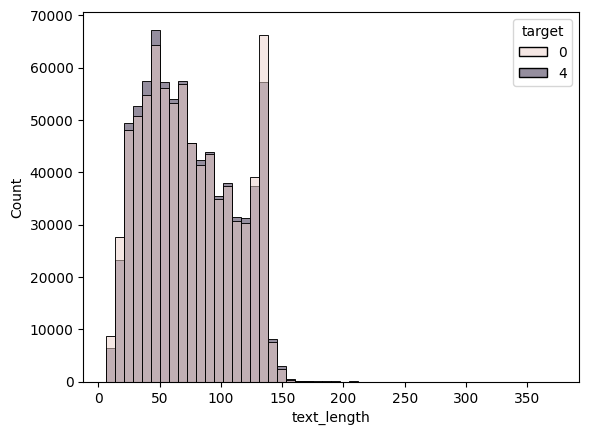

In [ ]:
sns.histplot(data=df, x="text_length", hue="target", bins=50)


In [ ]:
cv = CountVectorizer(stop_words="english", max_features=20)
cv.fit(df["text"])

cv.get_feature_names_out()


array(['amp', 'com', 'day', 'don', 'going', 'good', 'got', 'http', 'im',
       'just', 'know', 'like', 'lol', 'love', 'night', 'quot', 'really',
       'time', 'today', 'work'], dtype=object)

In [19]:
def clean_tweet(text: str) -> str:
    text = text.lower()
    text = re.sub(r"http\S+", " URL ", text)        # URLs
    text = re.sub(r"@\w+", " USER ", text)          # mentions
    text = re.sub(r"#", "", text)                   # hashtags -> mot
    text = re.sub(r"&amp;|&quot;", " ", text)       # HTML
    text = re.sub(r"[^a-z\s]", " ", text)           # ponctuation
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [22]:
df["text_clean"] = df["text"].apply(clean_tweet)

In [23]:
df[["text", "text_clean"]].head(3)

,text,text_clean
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww that s a bummer you shoulda got david car...
1,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
